<a href="https://colab.research.google.com/github/saahil-jain/Covid_19_predictor/blob/master/NODE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from copy import deepcopy

print(os.getcwd())
if os.getcwd().split("/")[-1] == "Covid_19_predictor":
  print("Current working directory is already Covid_19_predictor")
elif os.path.isdir("Covid_19_predictor"):
  print("Covid_19_predictor already Exists")
else:
  ! git clone https://github.com/saahil-jain/Covid_19_predictor.git

/content
Covid_19_predictor already Exists


In [2]:
if os.path.isdir("Covid_19_predictor"):
  % cd Covid_19_predictor
! git pull

/content/Covid_19_predictor
Already up to date.


In [3]:
df = pd.read_csv("data.csv")
df.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
0,05/06/2020,5,6,2020,787,6,Afghanistan,AF,AFG,37172386.0,Asia
1,04/06/2020,4,6,2020,758,24,Afghanistan,AF,AFG,37172386.0,Asia
2,03/06/2020,3,6,2020,759,5,Afghanistan,AF,AFG,37172386.0,Asia
3,02/06/2020,2,6,2020,545,8,Afghanistan,AF,AFG,37172386.0,Asia
4,01/06/2020,1,6,2020,680,8,Afghanistan,AF,AFG,37172386.0,Asia


In [4]:
grouped = df.groupby('countriesAndTerritories')
countries = sorted(list(set(df.countriesAndTerritories.unique())))
country_population = {}
for country in countries:
  country_population[country] = set(grouped.get_group(country)['popData2018'])
countries_to_remove = ["Cases_on_an_international_conveyance_Japan", "Holy_See"]
for country in countries:
  if len(country_population[country])>1 :
    countries_to_remove.append(country)
for country in countries_to_remove:
  del country_population[country]
  countries.remove(country)

country_population = {}
for country in countries:
  country_population[country] = list(grouped.get_group(country)['popData2018'])[0]

In [5]:
country_wise_cases = dict()
country_wise_deaths = dict()
normalised_country_wise_cases = dict()
normalised_country_wise_deaths = dict()
for country in countries:
  country_wise_cases[country] = list(grouped.get_group(country)['cases'])[::-1]
  country_wise_deaths[country] = list(grouped.get_group(country)['deaths'])[::-1]
for country in countries:
  for index in range(len(country_wise_cases[country])):
    country_wise_cases[country][index] = abs(country_wise_cases[country][index])
    country_wise_deaths[country][index] = abs(country_wise_deaths[country][index])

for country in countries:
  leading_zero_count = 0
  for index in range(len(country_wise_cases[country])):
    if country_wise_cases[country][index] == 0:
      leading_zero_count += 1
    else:
      country_wise_cases[country] = country_wise_cases[country][leading_zero_count:]
      country_wise_deaths[country] = country_wise_deaths[country][leading_zero_count:]
      break

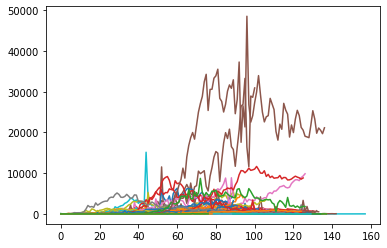

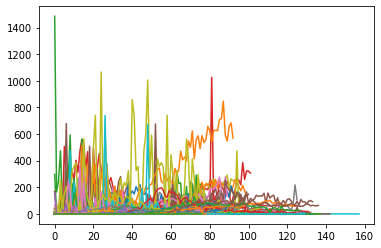

In [6]:
for country in countries:
  graph = plt.plot(country_wise_cases[country])
plt.show()

for country in countries:
  normalised_country_wise_cases[country] = deepcopy(country_wise_cases[country])
  for index in range(len(country_wise_cases[country])):
    normalised_country_wise_cases[country][index] = normalised_country_wise_cases[country][index] * 1000000 / country_population[country]
  graph=plt.plot(normalised_country_wise_cases[country])
plt.show()

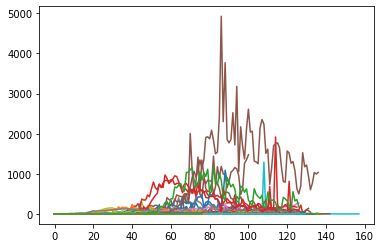

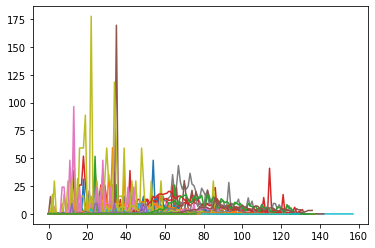

In [7]:
for country in countries:
  graph = plt.plot(country_wise_deaths[country])
plt.show()

for country in countries:
  normalised_country_wise_deaths[country] = deepcopy(country_wise_deaths[country])
  for index in range(len((country_wise_deaths[country]))):
    normalised_country_wise_deaths[country][index] = normalised_country_wise_deaths[country][index] * 1000000 / country_population[country]
  graph = plt.plot(normalised_country_wise_deaths[country])
plt.show()

In [8]:
cumulative_country_wise_cases = dict()
cumulative_country_wise_deaths = dict()
normalised_cumulative_country_wise_cases = dict()
normalised_cumulative_country_wise_deaths = dict()

for country in countries:
  cumulative_country_wise_cases[country] = []
  cumulative_country_wise_deaths[country] = []
  cumulative_cases = 0
  cumulative_death = 0
  normalised_cumulative_country_wise_cases[country] = []
  normalised_cumulative_country_wise_deaths[country] = []
  normalised_cumulative_cases = 0
  normalised_cumulative_death = 0
  total_days = len(country_wise_cases[country])
  for index in range(total_days):
    cumulative_cases += country_wise_cases[country][index]
    cumulative_death += country_wise_deaths[country][index]
    cumulative_country_wise_cases[country].append(cumulative_cases)
    cumulative_country_wise_deaths[country].append(cumulative_death)
    normalised_cumulative_cases += normalised_country_wise_cases[country][index]
    normalised_cumulative_death += normalised_country_wise_deaths[country][index]
    normalised_cumulative_country_wise_cases[country].append(normalised_cumulative_cases)
    normalised_cumulative_country_wise_deaths[country].append(normalised_cumulative_death)

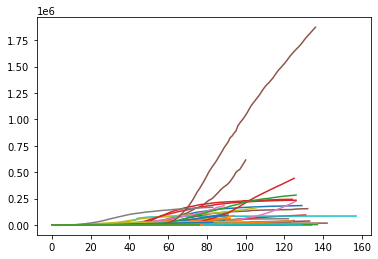

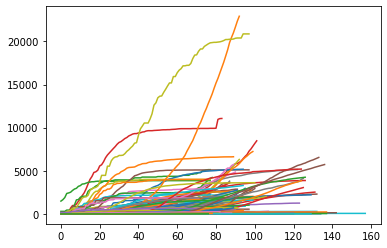

In [9]:
for country in countries:
  graph = plt.plot(cumulative_country_wise_cases[country])
plt.show()

for country in countries:
  graph = plt.plot(normalised_cumulative_country_wise_cases[country])
plt.show()

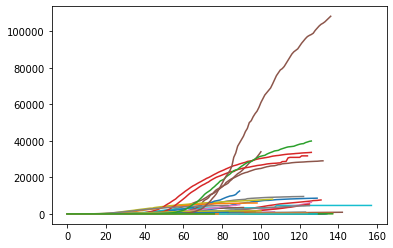

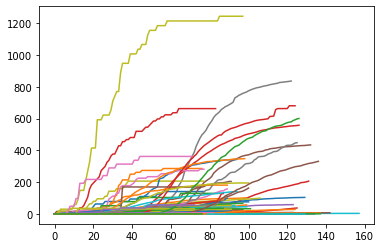

In [10]:
for country in countries:
  graph = plt.plot(cumulative_country_wise_deaths[country])
plt.show()

for country in countries:
  graph = plt.plot(normalised_cumulative_country_wise_deaths[country])
plt.show()

In [11]:
for country in countries:
  print("{0:45s}".format(country),"{0:10d}".format(cumulative_country_wise_cases[country][-1]),"{0:10d}".format(cumulative_country_wise_deaths[country][-1]))

Afghanistan                                        18054        300
Albania                                             1197         33
Algeria                                             9831        681
Andorra                                              852         51
Angola                                                86          4
Antigua_and_Barbuda                                   26          3
Argentina                                          19255        588
Armenia                                            11221        176
Aruba                                                101          3
Australia                                           7240        102
Austria                                            16741        670
Azerbaijan                                          6522         78
Bahamas                                              102         11
Bahrain                                            13296         21
Bangladesh                                      

In [12]:
top_n = 10
countries_and_cases=[]
countries_and_deaths=[]

for country, cumulative_cases in zip(cumulative_country_wise_cases.keys(), cumulative_country_wise_cases.values()):
  countries_and_cases.append([country, cumulative_cases[-1]])
countries_and_cases = sorted(countries_and_cases,key = lambda x:x[1],reverse=True)
top_n_cases = list(map(lambda x:x[0], countries_and_cases))[:top_n]

for country, cumulative_deaths in zip(cumulative_country_wise_deaths.keys(), cumulative_country_wise_deaths.values()):
  countries_and_deaths.append([country, cumulative_deaths[-1]])
countries_and_deaths = sorted(countries_and_deaths, key = lambda x:x[1], reverse = True)

top_n_deaths = list(map(lambda x:x[0],countries_and_deaths))[:top_n]

print("{0:45s}".format("Total Cases"), "{0:45s}".format("Total Deaths"), end="\n\n")
for index in range(top_n):
  print("{0:45s}".format(top_n_cases[index]), "{0:45s}".format(top_n_deaths[index])) 

Total Cases                                   Total Deaths                                 

United_States_of_America                      United_States_of_America                     
Brazil                                        United_Kingdom                               
Russia                                        Brazil                                       
United_Kingdom                                Italy                                        
Spain                                         Spain                                        
Italy                                         France                                       
India                                         Mexico                                       
Germany                                       Belgium                                      
Peru                                          Germany                                      
Turkey                                        Iran                             

In [13]:
def intersection(lst1, lst2): 
  return list(set(lst1) & set(lst2)) 
training_countries = list(intersection(top_n_cases, top_n_deaths))
print(training_countries)

['Germany', 'Brazil', 'Spain', 'United_Kingdom', 'United_States_of_America', 'Italy']


In [14]:
plt.style.use('seaborn-whitegrid')
from sklearn.preprocessing import MinMaxScaler
import math
from sklearn.metrics import mean_squared_error

In [15]:
def return_rmse(test,predicted):
  rmse = math.sqrt(mean_squared_error(test, predicted))
  print("The root mean squared error is {}.".format(rmse))

In [16]:
base_data_cases = normalised_country_wise_cases
base_data_deaths = normalised_country_wise_deaths

def split(dataframe, split_factor):
  base_data = {}
  for country in training_countries:
    base_data[country] = {}
    country_data_length = len(dataframe[country])
    split_index = int(math.floor(country_data_length * split_factor))
    base_data[country]["Train"] = dataframe[country][:split_index]
    base_data[country]["Test"] = dataframe[country][split_index:]
  return base_data

split_factor = 0.8

transform_train_cases = {}
transform_test_cases = {}
scaler_cases = {}
data_cases = split(base_data_cases, split_factor)
for num, country in enumerate(training_countries):
  sc = MinMaxScaler(feature_range=(0,1))
  a0 = np.array(data_cases[country]["Train"])
  a1 = np.array(data_cases[country]["Test"])
  a0 = a0.reshape(a0.shape[0],1)
  a1 = a1.reshape(a1.shape[0],1)
  transform_train_cases[country] = sc.fit_transform(a0)
  transform_test_cases[country] = sc.fit_transform(a1)
  scaler_cases[country] = sc
del a0
del a1

transform_train_deaths = {}
transform_test_deaths = {}
scaler_deaths = {}
data_deaths = split(base_data_deaths, split_factor)
for num, country in enumerate(training_countries):
  sc = MinMaxScaler(feature_range=(0,1))
  a0 = np.array(data_deaths[country]["Train"])
  a1 = np.array(data_deaths[country]["Test"])
  a0 = a0.reshape(a0.shape[0],1)
  a1 = a1.reshape(a1.shape[0],1)
  transform_train_deaths[country] = sc.fit_transform(a0)
  transform_test_deaths[country] = sc.fit_transform(a1)
  scaler_deaths[country] = sc
del a0
del a1

In [17]:
for i in transform_train_cases.keys():
    print(i, transform_train_cases[i].shape)
print("\n")    
for i in transform_test_cases.keys():
    print(i, transform_test_cases[i].shape)
 
print("\n")    
for i in transform_train_deaths.keys():
    print(i, transform_train_deaths[i].shape)
print("\n")    
for i in transform_test_deaths.keys():
    print(i, transform_test_deaths[i].shape)

Germany (104, 1)
Brazil (80, 1)
Spain (100, 1)
United_Kingdom (101, 1)
United_States_of_America (109, 1)
Italy (101, 1)


Germany (26, 1)
Brazil (21, 1)
Spain (25, 1)
United_Kingdom (26, 1)
United_States_of_America (28, 1)
Italy (26, 1)


Germany (104, 1)
Brazil (80, 1)
Spain (100, 1)
United_Kingdom (101, 1)
United_States_of_America (109, 1)
Italy (101, 1)


Germany (26, 1)
Brazil (21, 1)
Spain (25, 1)
United_Kingdom (26, 1)
United_States_of_America (28, 1)
Italy (26, 1)


In [18]:
trainset_cases = {}
testset_cases = {}
look_back_cases = 3
for country in training_countries:
    trainset_cases[country] = {}
    X_train = []
    y_train = []
    for i in range(look_back_cases, len(transform_train_cases[country])):
      X_train.append(transform_train_cases[country][i-look_back_cases:i,0])
      y_train.append(transform_train_cases[country][i,0])
    X_train, y_train = np.array(X_train), np.array(y_train)
    trainset_cases[country]["X"] = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
    trainset_cases[country]["y"] = y_train
    
    testset_cases[country] = {}
    X_test = []
    y_test = []    
    for i in range(look_back_cases, len(transform_test_cases[country])):
      X_test.append(transform_test_cases[country][i-look_back_cases:i,0])
      y_test.append(transform_test_cases[country][i,0])
    X_test, y_test = np.array(X_test), np.array(y_test)
    testset_cases[country]["X"] = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
    testset_cases[country]["y"] = y_test

trainset_deaths = {}
testset_deaths = {}
look_back_deaths = 3
for country in training_countries:
    trainset_deaths[country] = {}
    X_train = []
    y_train = []
    for i in range(look_back_deaths, len(transform_train_deaths[country])):
      X_train.append(transform_train_deaths[country][i-look_back_deaths:i,0])
      y_train.append(transform_train_deaths[country][i,0])
    X_train, y_train = np.array(X_train), np.array(y_train)
    trainset_deaths[country]["X"] = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
    trainset_deaths[country]["y"] = y_train
    
    testset_deaths[country] = {}
    X_test = []
    y_test = []    
    for i in range(look_back_deaths, len(transform_test_deaths[country])):
      X_test.append(transform_test_deaths[country][i-look_back_deaths:i,0])
      y_test.append(transform_test_deaths[country][i,0])
    X_test, y_test = np.array(X_test), np.array(y_test)
    testset_deaths[country]["X"] = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
    testset_deaths[country]["y"] = y_test

In [19]:
arr_buff_cases = []
for country in training_countries:
  buff = {}
  buff["X_train"] = trainset_cases[country]["X"].shape
  buff["y_train"] = trainset_cases[country]["y"].shape
  buff["X_test"] = testset_cases[country]["X"].shape
  buff["y_test"] = testset_cases[country]["y"].shape
  arr_buff_cases.append(buff)

pd.DataFrame(arr_buff_cases, index=training_countries)

,X_train,y_train,X_test,y_test
Germany,"(101, 3, 1)","(101,)","(23, 3, 1)","(23,)"
Brazil,"(77, 3, 1)","(77,)","(18, 3, 1)","(18,)"
Spain,"(97, 3, 1)","(97,)","(22, 3, 1)","(22,)"
United_Kingdom,"(98, 3, 1)","(98,)","(23, 3, 1)","(23,)"
United_States_of_America,"(106, 3, 1)","(106,)","(25, 3, 1)","(25,)"
Italy,"(98, 3, 1)","(98,)","(23, 3, 1)","(23,)"


In [20]:
arr_buff_deaths = []
for country in training_countries:
  buff = {}
  buff["X_train"] = trainset_deaths[country]["X"].shape
  buff["y_train"] = trainset_deaths[country]["y"].shape
  buff["X_test"] = testset_deaths[country]["X"].shape
  buff["y_test"] = testset_deaths[country]["y"].shape
  arr_buff_deaths.append(buff)

pd.DataFrame(arr_buff_deaths, index=training_countries)

,X_train,y_train,X_test,y_test
Germany,"(101, 3, 1)","(101,)","(23, 3, 1)","(23,)"
Brazil,"(77, 3, 1)","(77,)","(18, 3, 1)","(18,)"
Spain,"(97, 3, 1)","(97,)","(22, 3, 1)","(22,)"
United_Kingdom,"(98, 3, 1)","(98,)","(23, 3, 1)","(23,)"
United_States_of_America,"(106, 3, 1)","(106,)","(25, 3, 1)","(25,)"
Italy,"(98, 3, 1)","(98,)","(23, 3, 1)","(23,)"


In [21]:
total_error = dict()
total_error["Cases"] = 0
total_error["Deaths"] = 0
  
def lagging(df, lag):
  df_pred = pd.Series(df["Pred"].reshape(-1))
  df_true = pd.Series(df["True"].reshape(-1))
   
  df_pred_lag = df_pred.shift(lag)
    
  MSE_lag = mean_squared_error(np.array(df_true[:-lag]), np.array(df_pred_lag[:-lag]))
  print("MSE with Lag    :", MSE_lag)

  plt.figure(figsize=(14,4))
  plt.title("Prediction with Lag")
  plt.plot(df_true, color='green')
  plt.plot(df_pred_lag, color='blue')
  plt.legend(["True", "Predicted"])

  return MSE_lag

In [22]:
trainset_cases = {}
testset_cases = {}
look_back_cases = 1
for country in training_countries:
    trainset_cases[country] = {}
    X_train = []
    y_train = []
    for i in range(look_back_cases, len(transform_train_cases[country])):
        X_train.append(transform_train_cases[country][i-look_back_cases:i,0])
        y_train.append(transform_train_cases[country][i,0])
    X_train, y_train = np.array(X_train), np.array(y_train)
    trainset_cases[country]["X"] = X_train
    trainset_cases[country]["y"] = np.reshape(y_train,(y_train.shape[0],1))
    
    testset_cases[country] = {}
    X_test = []
    y_test = []    
    for i in range(look_back_cases, len(transform_test_cases[country])):
        X_test.append(transform_test_cases[country][i-look_back_cases:i,0])
        y_test.append(transform_test_cases[country][i,0])
    X_test, y_test = np.array(X_test), np.array(y_test)
    testset_cases[country]["X"] = X_test
    testset_cases[country]["y"] = np.reshape(y_test,(y_test.shape[0],1))

trainset_deaths = {}
testset_deaths = {}
look_back_deaths = 1
for country in training_countries:
    trainset_deaths[country] = {}
    X_train = []
    y_train = []
    for i in range(look_back_deaths, len(transform_train_deaths[country])):
        X_train.append(transform_train_deaths[country][i-look_back_deaths:i,0])
        y_train.append(transform_train_deaths[country][i,0])
    X_train, y_train = np.array(X_train), np.array(y_train)
    trainset_deaths[country]["X"] = X_train
    trainset_deaths[country]["y"] = np.reshape(y_train,(y_train.shape[0],1))
    
    testset_deaths[country] = {}
    X_test = []
    y_test = []    
    for i in range(look_back_deaths, len(transform_test_deaths[country])):
        X_test.append(transform_test_deaths[country][i-look_back_deaths:i,0])
        y_test.append(transform_test_deaths[country][i,0])
    X_test, y_test = np.array(X_test), np.array(y_test)
    testset_deaths[country]["X"] = X_test
    testset_deaths[country]["y"] = np.reshape(y_test,(y_test.shape[0],1))

In [23]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.optim.lr_scheduler import StepLR, MultiStepLR

In [24]:
def norm(dim):
    return nn.GroupNorm(min(32, dim), dim)
    
def zip_map(zipped, update_op):
    return [update_op(*elems) for elems in zipped]

def euler_update(h_list, dh_list, dt):
    return zip_map(zip(h_list, dh_list), lambda h, dh: h + dt * dh)

def euler_step(func, dt, state):
    return euler_update(state, func(state), dt)

def rk2_step(func, dt, state, **kwargs):
    k1 = func(state, **kwargs)
    k2 = func(euler_update(state, k1, dt), **kwargs)
    return zip_map(zip(state, k1, k2),
                   lambda h, dk1, dk2: h + dt * (dk1 + dk2) / 2)

def rk4_step(func, dt, state, **kwargs):
    k1 = func(state, **kwargs)
    k2 = func(euler_update(state, k1, dt / 2), **kwargs)
    k3 = func(euler_update(state, k2, dt / 2), **kwargs)
    k4 = func(euler_update(state, k3, dt), **kwargs)

    return zip_map(
        zip(state, k1, k2, k3, k4), lambda h, dk1, dk2, dk3, dk4: h + dt * ( dk1 + 2 * dk2 + 2 * dk3 + dk4) / 6,)
    
def forward_dynamics(state, nnet):
    t, y = state
    return [1.0, nnet(t, y)]

def backward_dynamics(state, nnet):
    with torch.set_grad_enabled(True):
        t, ht, at = state[0], state[1], state[2]
        ht = ht.detach()
        ht.requires_grad_(True)
        ht_new = nnet(t, ht)
        gradients = torch.autograd.grad(ht_new, [ht] + [w for w in nnet.parameters()], at, allow_unused=True, retain_graph=True)
    return [1.0, ht_new, *gradients]

class NeuralODEFunction(torch.autograd.Function):
    @staticmethod
    def forward(ctx, input, nnet, solver, t, *params):
        delta_t = t[1:] - t[:-1]

        ctx.nnet = nnet
        ctx.solver = solver
        ctx.delta_t = delta_t

        state = [0, input]
        for dt in delta_t:
            state = solver(func=forward_dynamics, dt=float(dt), state=state, nnet=nnet)
        output = state[1]
        
        ctx.save_for_backward(input, output)
        return output

    @staticmethod
    def backward(ctx, output_gradients):
        input, output = ctx.saved_tensors
        nnet = ctx.nnet
        solver = ctx.solver
        delta_t = ctx.delta_t
        params = nnet.parameters()

        grad_weights = []
        for p in params:
            grad_weights.append(torch.zeros_like(p))

        state = [1, output, output_gradients, *grad_weights]

        for i, dt in enumerate(delta_t):
            state = solver(func=backward_dynamics, dt=float(dt), state=state, nnet=nnet)

        grad_input = state[2]
        grad_weights = state[3:]
        return (grad_input, None, None, None, *grad_weights)

class NeuralODE(nn.Module):
    def __init__(self, model, solver=rk4_step, t=np.linspace(0,99,99)):
      super().__init__()
      self.t = t
      self.model = model
      self.solver = solver
      self.params = [w for w in model.parameters()]

    def changetime(self, x):
      self.t = np.array([n+1 for n in range(x)])

    def forward(self, input):
      return NeuralODEFunction.apply(input, self.model, self.solver, self.t, *self.params)

class ODEfunc(nn.Module):
    def __init__(self, dim):
        super(ODEfunc, self).__init__()
        self.norm1 = norm(dim)
        self.relu = nn.ReLU(inplace=True)
        self.conv1 = ConcatConv2d(dim, dim, 3, 1, 1)
        self.norm2 = norm(dim)
        self.conv2 = ConcatConv2d(dim, dim, 3, 1, 1)
        self.norm3 = norm(dim)
        self.nfe = 0

    def forward(self, x):
        self.nfe += 1
        out = self.norm1(x)
        out = self.relu(out)
        out = self.conv1(t, out)
        out = self.norm2(out)
        out = self.relu(out)
        out = self.conv2(t, out)
        out = self.norm3(out)
        return out

class arguments:
  def __init__(self):
    self.batch_size=64
    self.test_batch_size=1000
    self.epochs=15
    self.lr=0.01
    self.gamma=0.7
    self.seed=1
    self.log_interval=5
    
args=arguments()
device = torch.device("cpu")

In [25]:
trainset_cases_pre = {}
testset_cases_pre = {}
trainset_deaths_pre = {}
testset_deaths_pre = {}

for country in training_countries:
    trainset_cases_pre[country] = {}
    testset_cases_pre[country] = {}
    trainset_deaths_pre[country] = {}
    testset_deaths_pre[country] = {}
for country in training_countries:
  for x_or_y in ["X","y"]:
    trainset_cases_pre[country][x_or_y]=np.float32(trainset_cases[country][x_or_y])
    testset_cases_pre[country][x_or_y]=np.float32(testset_cases[country][x_or_y])

    trainset_deaths_pre[country][x_or_y]=np.float32(trainset_deaths[country][x_or_y])
    testset_deaths_pre[country][x_or_y]=np.float32(testset_deaths[country][x_or_y])



In [26]:
trainset = dict()
testset = dict()

for country in training_countries:
  trainset_cases[country] = torch.utils.data.DataLoader((trainset_cases_pre[country]["X"], trainset_cases_pre[country]["y"]), batch_size=10, shuffle=False)
  testset_cases[country] = torch.utils.data.DataLoader((testset_cases_pre[country]["X"], testset_cases_pre[country]["y"]), batch_size=10, shuffle=False)
  trainset_deaths[country] = torch.utils.data.DataLoader((trainset_deaths_pre[country]["X"], trainset_deaths_pre[country]["y"]), batch_size=10, shuffle=False)
  testset_deaths[country] = torch.utils.data.DataLoader((testset_deaths_pre[country]["X"], testset_deaths_pre[country]["y"]), batch_size=10, shuffle=False)

In [27]:
class Net(nn.Module):
    def __init__(self):
      super(Net, self).__init__()
      self.fc1 = nn.Linear(1, 64)
      self.fc2 = nn.Linear(64, 64)
      #self.fc3 = nn.Linear(64, 128)
      #self.fc4 = nn.Linear(128, 256)
      #self.fc5 = nn.Linear(256, 256)
      #self.fc6 = nn.Linear(256, 128)
      #self.fc7 = nn.Linear(128, 64)
      self.fc8 = nn.Linear(64, 64)
      self.fc9 = nn.Linear(64, 1)

    def forward(self, x):
      x = torch.tanh(self.fc1(x))
      x = torch.tanh(self.fc2(x))
      #x = torch.tanh(self.fc3(x))
      #x = torch.tanh(self.fc4(x))
      #x = torch.tanh(self.fc5(x))
      #x = torch.tanh(self.fc6(x))
      #x = torch.tanh(self.fc7(x))
      x = torch.tanh(self.fc8(x))
      x = self.fc9(x)
      return x

In [28]:
def train(args, model, device, train_loader, optimizer, epoch, country_name, history_dict , op):
  model.train()
  batch_idx = 0
  correct = 0
  total = 0
  for (x,y) in enumerate(train_loader):
    data = y[0]
    target = y[1]
    data, target = data.to(device), target.to(device)
    optimizer.zero_grad()
    output = model(data)
    loss = loss_function(output,target)
    loss.backward()
    optimizer.step()
    batch_idx += 1
    print("{0:45s}".format(country), loss.item())
    history_dict[country_name].append(loss.item())
    
    # for idx, i in enumerate(output):
      #   if torch.argmax(i) == target[idx]:
      #     correct += 1
      #     total += 1

    op[country_name]["Target"] = target.tolist()
    op[country_name]["Prediction"] = output.tolist()
  # print(target, output)
  # print("Accuracy =",100*(correct/total))

def test(args, model, device, test_loader, country_name , op):
  model.eval()
  test_loss = 0
  correct = 0
  total = 0
  with torch.no_grad():
    for data, target in enumerate(test_loader):
      data = target[0]
      target = target[1]
      data, target = data.to(device), target.to(device)
      output = model(data)
      loss = loss_function(output,target)
      test_loss += loss

      # for idx, i in enumerate(output):
      #   if torch.argmax(i) == target[idx]:
      #     correct += 1
      #     total += 1

      op[country_name]["Target"] = target.tolist()
      op[country_name]["Prediction"] = output.tolist()
    return test_loss
  # print(target, output)
  #print("Accuracy: ", round(correct/total, 3))

def test_val(args, model, device, test_loader, country_name , op):
  model.eval()
  test_loss = 0
  correct = 0
  with torch.no_grad():
    for data, target in enumerate(test_loader):
      data = target[0]
      target = target[1]
      data, target = data.to(device), target.to(device)
      output = model(data)
      loss = loss_function(output,target)
      test_loss += loss
      # pred = output.argmax(dim=1, keepdim=True)
      # correct += pred.eq(target.view_as(pred)).sum().item()
      op[country_name]["Target"] = target.tolist()
      op[country_name]["Prediction"] = output.tolist()
    return output


Train Epoch: 0
Germany                                       0.13691595196723938
Brazil                                        0.4709276556968689
Spain                                         0.04048336297273636
United_Kingdom                                0.17476199567317963
United_States_of_America                      0.049249317497015
Italy                                         0.029854632914066315

Train Epoch: 1
Germany                                       0.11740385740995407
Brazil                                        0.09135126322507858
Spain                                         0.02019049972295761
United_Kingdom                                0.01102767325937748
United_States_of_America                      0.04491221159696579
Italy                                         0.05452694371342659

Train Epoch: 2
Germany                                       0.05964513123035431
Brazil                                        0.023812487721443176
Spain                        

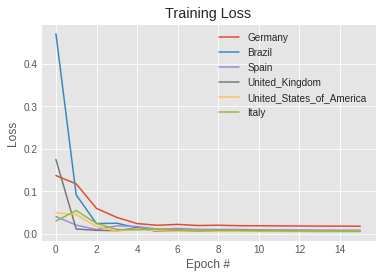

In [29]:
%%time
#normal NN training
loss_function = nn.MSELoss()
history_NN_cases = {}
for country in training_countries:
  history_NN_cases[country] = []
model_cases = Net().to(device)
optimizer = optim.Adam(model_cases.parameters(), lr=0.01)

epochs = 16

for epoch in range(epochs):
    print('\nTrain Epoch: {}'.format(epoch))
    for country in training_countries:
        for (x,y) in enumerate(trainset_cases[country]):
            data = y[0]
            target = y[1]
            model_cases.zero_grad()
            output = model_cases(data)
            loss=loss_function(target,output)
            loss.backward()
            optimizer.step()
        print("{0:45s}".format(country), loss.item()) 
        history_NN_cases[country].append(loss.item())

plt.style.use("ggplot")
plt.figure()
for country in training_countries:
  plt.plot(np.arange(0, epochs), history_NN_cases[country], label=country)
plt.title("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend(loc="upper right")


Train Epoch: 0
Germany                                       0.19177629053592682
Brazil                                        0.797271192073822
Spain                                         0.0801190584897995
United_Kingdom                                0.1106032207608223
United_States_of_America                      0.17800204455852509
Italy                                         0.21632997691631317

Train Epoch: 1
Germany                                       0.14730016887187958
Brazil                                        0.0745270848274231
Spain                                         0.0853082686662674
United_Kingdom                                0.06681931763887405
United_States_of_America                      0.06113212928175926
Italy                                         0.07886632531881332

Train Epoch: 2
Germany                                       0.06711842864751816
Brazil                                        0.034828510135412216
Spain                            

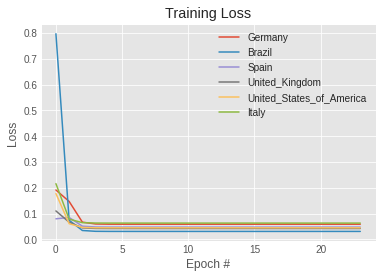

In [31]:
%%time
history_cases = {}
op_cases_train = {}
op_cases_test = {}
for country in training_countries:
  history_cases[country] = []
  op_cases_train[country] = {}
  op_cases_test[country] = {}
  for output_or_prediction in ["Target", "Prediction"]:
    op_cases_train[country][output_or_prediction] = []
    op_cases_test[country][output_or_prediction] = []

model_cases = Net().to(device)
#model_cases = NeuralODE(model_cases)
loss_function=nn.MSELoss()

optimizer = optim.Adam(model_cases.parameters(), lr = 0.01)

NODE_loss_cases = {}
scheduler = StepLR(optimizer, step_size=1, gamma=args.gamma)

epochs = 24

for epoch in range(epochs):
    print('\nTrain Epoch: {}'.format(epoch))
    for country in training_countries:
      #model_cases.changetime(trainset_cases_pre[country]["X"].shape[0])
      train(args, model_cases, device, trainset_cases[country], optimizer, epoch, country, history_cases , op_cases_train)
      NODE_loss_cases[country] = test(args, model_cases, device, testset_cases[country], country, op_cases_test)
      scheduler.step()

plt.style.use("ggplot")
plt.figure()
for country in training_countries:
  plt.plot(np.arange(0, epochs), history_cases[country], label=country)
plt.title("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend(loc="upper right")

MSE with Lag    : 27.194720238579276
MSE with Lag    : 242.35612581775874
MSE with Lag    : 5.846434194733714
MSE with Lag    : 898.6700810964236
MSE with Lag    : 175.74291498372173
MSE with Lag    : 23.943690928613247


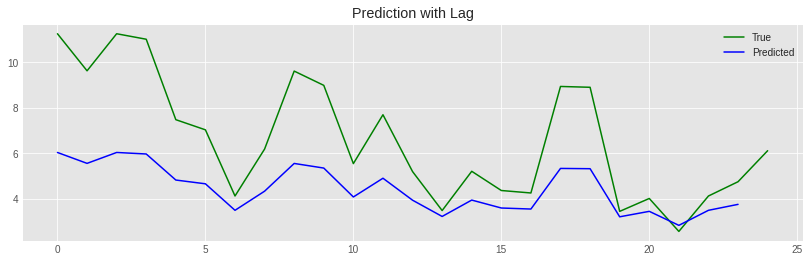

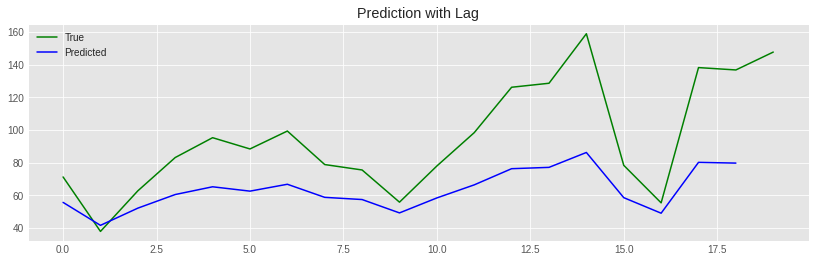

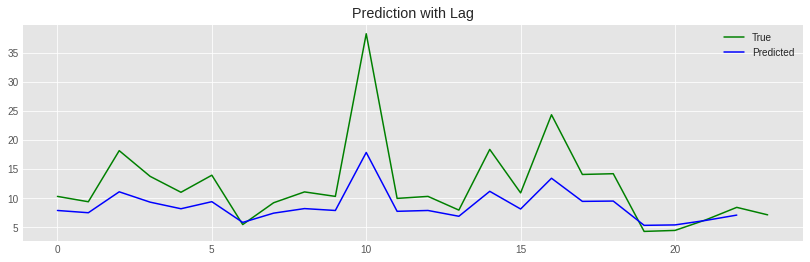

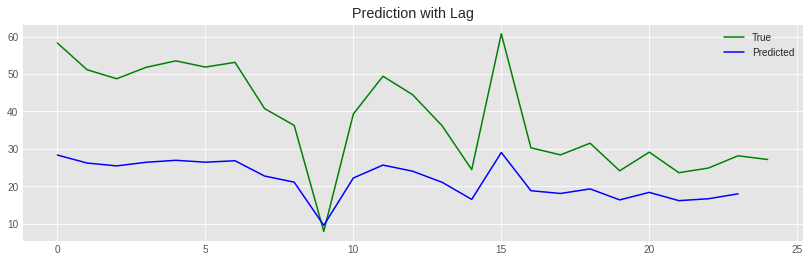

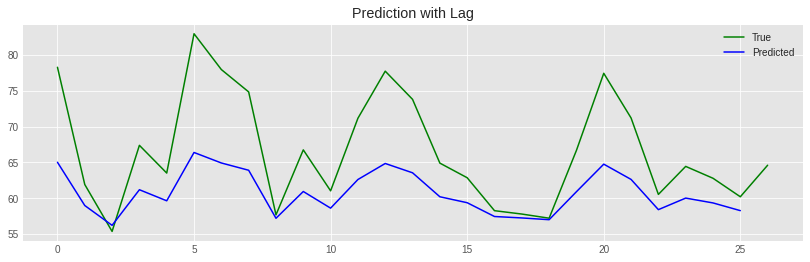

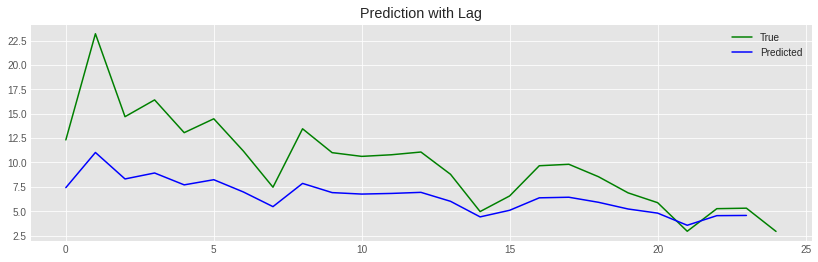

In [32]:
pred_result_cases = {}
for country in training_countries:
    y_true = scaler_cases[country].inverse_transform(testset_cases_pre[country]["y"].reshape(-1,1))
    y_pred = scaler_cases[country].inverse_transform(test_val(args, model_cases, device, testset_cases[country], country, op_cases_test))
    MSE = mean_squared_error(y_true, y_pred)
    pred_result_cases[country] = {}
    pred_result_cases[country]["True"] = y_true
    pred_result_cases[country]["Pred"] = y_pred
    
total_error["Cases"] = 0
for country in training_countries:
  total_error["Cases"] += lagging(pred_result_cases[country], -1)




Germany


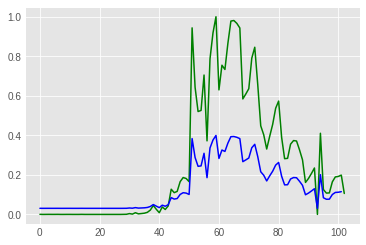

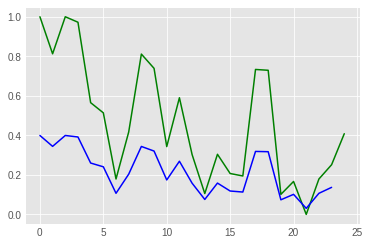




Brazil


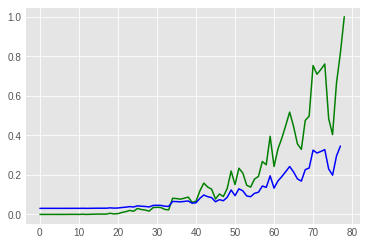

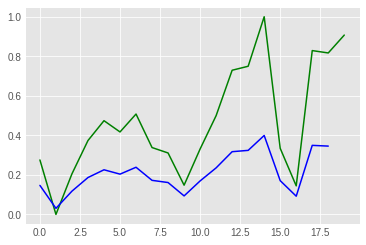




Spain


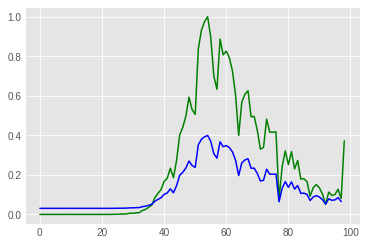

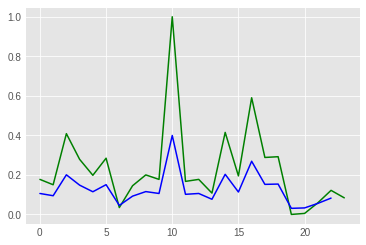




United_Kingdom


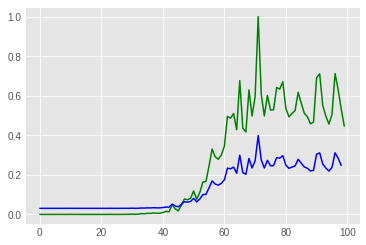

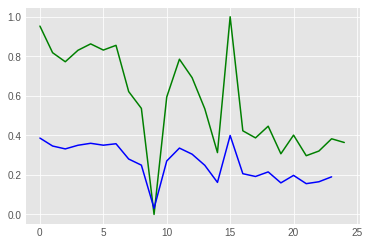




United_States_of_America


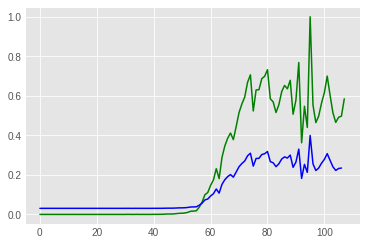

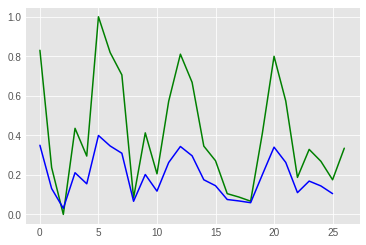




Italy


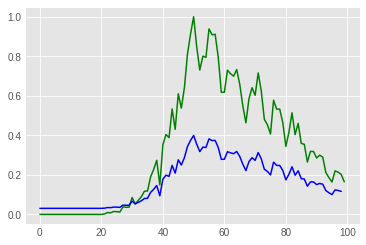

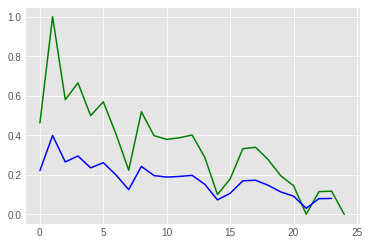

In [33]:
for country in training_countries:
  print("\n\n")
  print(country)
  plt.plot(op_cases_train[country]["Target"], color='green')
  plt.plot(op_cases_train[country]["Prediction"][look_back_cases:], color='blue')
  plt.show()
  plt.plot(op_cases_test[country]["Target"], color='green')
  plt.plot(op_cases_test[country]["Prediction"][look_back_cases:], color='blue')
  plt.show()


Train Epoch: 0
Germany                                       0.14538925886154175
Brazil                                        0.5938808917999268
Spain                                         0.04960619658231735
United_Kingdom                                0.12647108733654022
United_States_of_America                      0.09680741280317307
Italy                                         0.14213259518146515

Train Epoch: 1
Germany                                       0.09466101229190826
Brazil                                        0.059022944420576096
Spain                                         0.06280001997947693
United_Kingdom                                0.055590465664863586
United_States_of_America                      0.020446132868528366
Italy                                         0.03869760036468506

Train Epoch: 2
Germany                                       0.03967001661658287
Brazil                                        0.02631113864481449
Spain                     

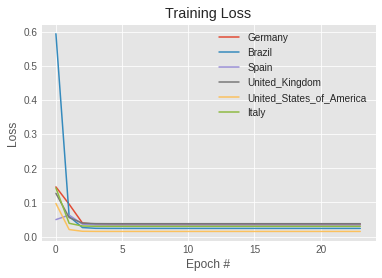

In [34]:
%%time
history_deaths = {}
op_deaths_train = {}
op_deaths_test={}
for country in training_countries:
  history_deaths[country] = []
  op_deaths_train[country] = {}
  op_deaths_test[country] = {}
  for output_or_prediction in ["Target", "Prediction"]:
    op_deaths_train[country][output_or_prediction] = []
    op_deaths_test[country][output_or_prediction] = []

model_deaths = Net().to(device)
loss_function=nn.MSELoss()

optimizer = optim.Adam(model_deaths.parameters(), lr = 0.01)

NODE_loss_deaths = {}
scheduler = StepLR(optimizer, step_size=1, gamma=args.gamma)
for epoch in range(epochs):
    print('\nTrain Epoch: {}'.format(epoch))
    for country in training_countries:
      train(args, model_deaths, device, trainset_deaths[country], optimizer, epoch, country, history_deaths , op_deaths_train)
      NODE_loss_deaths[country] = test(args, model_deaths, device, testset_deaths[country], country , op_deaths_test)
      scheduler.step()

plt.style.use("ggplot")
plt.figure()
for country in training_countries:
  plt.plot(np.arange(0, epochs), history_deaths[country], label=country)
plt.title("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend(loc="upper right")

MSE with Lag    : 0.309339323936136
MSE with Lag    : 0.2544625119997181
MSE with Lag    : 0.19025306637134543
MSE with Lag    : 0.13593928199631733
MSE with Lag    : 1.9763013185584761
MSE with Lag    : 0.614245016441789


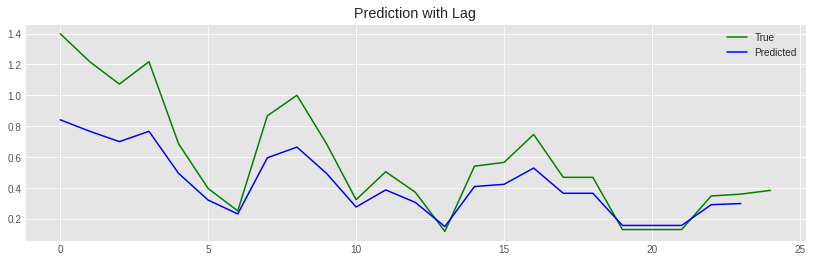

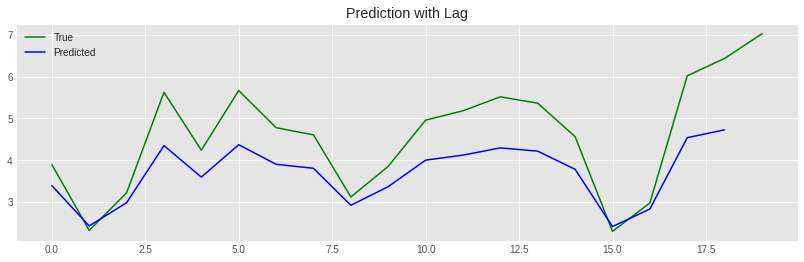

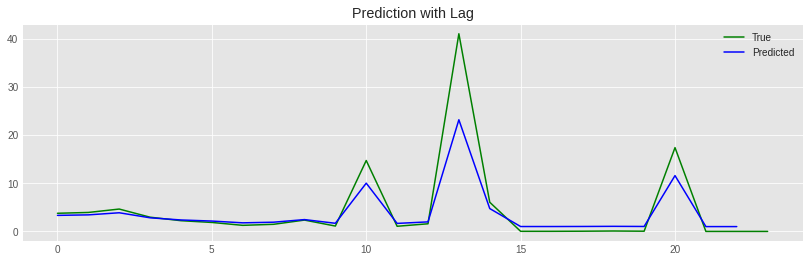

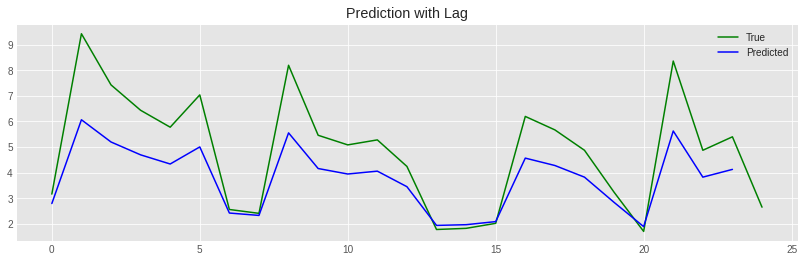

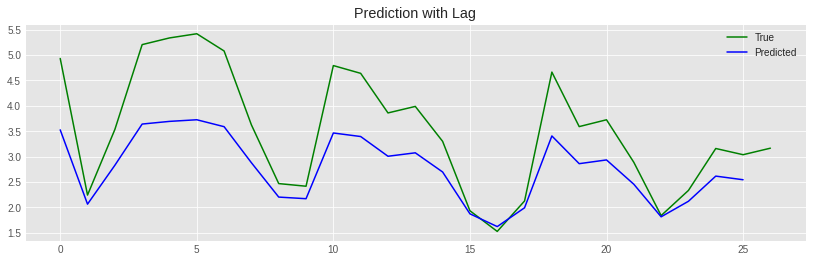

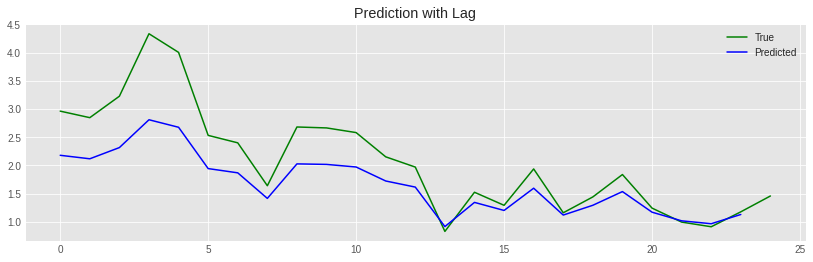

In [35]:
pred_result_deaths = {}
for country in training_countries:
    y_true = scaler_deaths[country].inverse_transform(testset_deaths_pre[country]["y"].reshape(-1,1))
    y_pred = scaler_deaths[country].inverse_transform(test_val(args, model_deaths, device, testset_deaths[country], country, op_deaths_test))
    MSE = mean_squared_error(y_true, y_pred)
    pred_result_deaths[country] = {}
    pred_result_deaths[country]["True"] = y_true
    pred_result_deaths[country]["Pred"] = y_pred
total_error["Deaths"] = 0
for country in training_countries:
  total_error["Deaths"] += lagging(pred_result_deaths[country], -1)




Germany


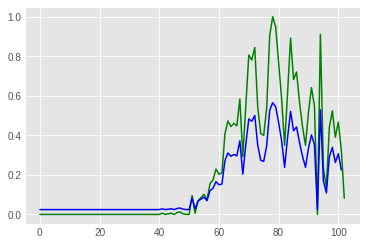

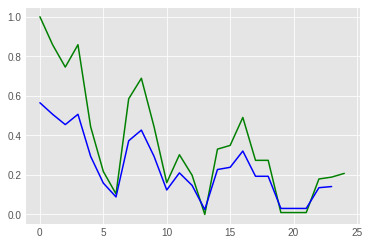




Brazil


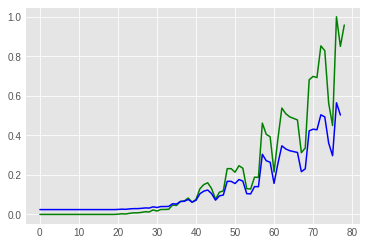

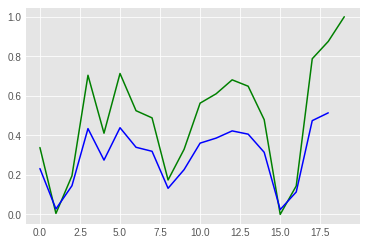




Spain


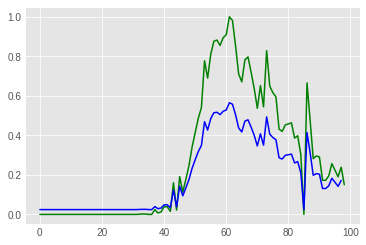

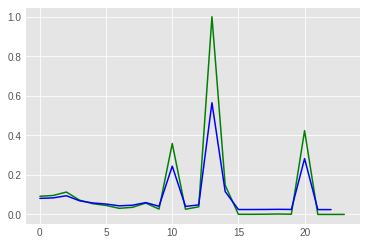




United_Kingdom


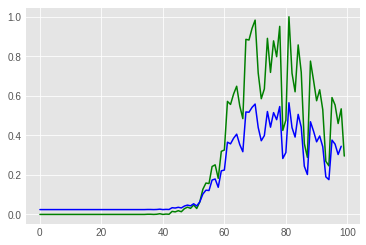

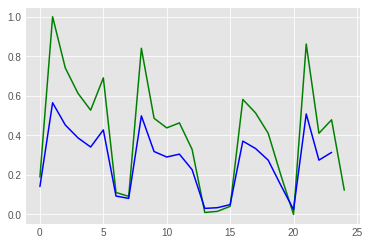




United_States_of_America


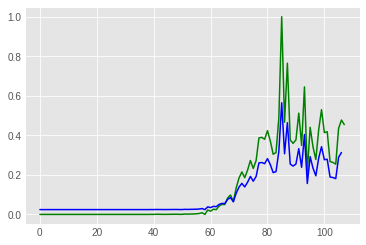

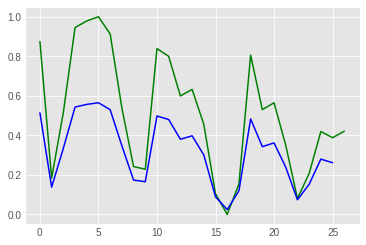




Italy


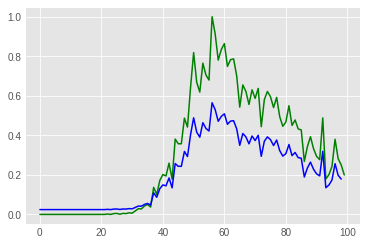

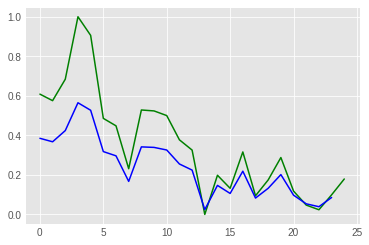

In [36]:
for country in training_countries:
  print("\n\n")
  print(country)
  plt.plot(op_deaths_train[country]["Target"], color='green')
  plt.plot(op_deaths_train[country]["Prediction"][look_back_cases:], color='blue')
  plt.show()
  plt.plot(op_deaths_test[country]["Target"], color='green')
  plt.plot(op_deaths_test[country]["Prediction"][look_back_cases:], color='blue')
  plt.show()

In [37]:
torch.save(model_cases.state_dict(), 'NODEcases.pth.tar')
torch.save(model_deaths.state_dict(), 'NODEdeaths.pth.tar')

In [38]:
total_error["Cases"] = 0
total_error["Deaths"] = 0
for country in training_countries:
  total_error["Cases"] += NODE_loss_cases[country]
  total_error["Deaths"] += NODE_loss_deaths[country]

In [39]:
print(total_error)

{'Cases': tensor(0.6305), 'Deaths': tensor(0.4872)}


In [40]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [41]:
df_latest = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/data.csv')
df_latest.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
0,12-06-2020,12,6,2020,747,21,Afghanistan,AF,AFG,37172386.0,Asia
1,11-06-2020,11,6,2020,684,21,Afghanistan,AF,AFG,37172386.0,Asia
2,10-06-2020,10,6,2020,542,15,Afghanistan,AF,AFG,37172386.0,Asia
3,09-06-2020,9,6,2020,575,12,Afghanistan,AF,AFG,37172386.0,Asia
4,08-06-2020,8,6,2020,791,30,Afghanistan,AF,AFG,37172386.0,Asia


In [42]:
grouped = df_latest.groupby('countriesAndTerritories')
countries=sorted(list(set(df_latest.countriesAndTerritories.unique())))
country_population = {}
for country in countries:
  country_population[country]=set(grouped.get_group(country)['popData2018'])
countries_to_remove = ["Cases_on_an_international_conveyance_Japan", "Holy_See"]
for country in countries:
  if len(country_population[country])>1 :
    countries_to_remove.append(country)
for country in countries_to_remove:
  del country_population[country]
  countries.remove(country)

country_population = {}
for country in countries:
  country_population[country]=list(grouped.get_group(country)['popData2018'])[0]

In [43]:
country_wise_cases=dict()
country_wise_deaths=dict()
normalised_country_wise_cases=dict()
normalised_country_wise_deaths=dict()
for country in countries:
  country_wise_cases[country]=list(grouped.get_group(country)['cases'])[::-1]
  country_wise_deaths[country]=list(grouped.get_group(country)['deaths'])[::-1]
for country in countries:
  for index in range(len(country_wise_cases[country])):
    country_wise_cases[country][index] = abs(country_wise_cases[country][index])
    country_wise_deaths[country][index] = abs(country_wise_deaths[country][index])

for country in countries:
  leading_zero_count = 0
  for index in range(len(country_wise_cases[country])):
    if country_wise_cases[country][index] == 0:
      leading_zero_count += 1
    else:
      country_wise_cases[country] = country_wise_cases[country][leading_zero_count:]
      country_wise_deaths[country] = country_wise_deaths[country][leading_zero_count:]
      break

In [44]:
for country in countries:
  normalised_country_wise_cases[country] = deepcopy(country_wise_cases[country])
  for index in range(len(country_wise_cases[country])):
    normalised_country_wise_cases[country][index] = normalised_country_wise_cases[country][index] * 1_000_000 / country_population[country]

for country in countries:
  normalised_country_wise_deaths[country] = deepcopy(country_wise_deaths[country])
  for index in range(len((country_wise_deaths[country]))):
    normalised_country_wise_deaths[country][index] = normalised_country_wise_deaths[country][index] * 1_000_000 / country_population[country]

In [45]:
cumulative_country_wise_cases=dict()
cumulative_country_wise_deaths=dict()
normalised_cumulative_country_wise_cases=dict()
normalised_cumulative_country_wise_deaths=dict()

for country in countries:
  cumulative_country_wise_cases[country] = []
  cumulative_country_wise_deaths[country] = []
  cumulative_cases = 0
  cumulative_death = 0
  normalised_cumulative_country_wise_cases[country] = []
  normalised_cumulative_country_wise_deaths[country] = []
  normalised_cumulative_cases = 0
  normalised_cumulative_death = 0
  total_days = len(country_wise_cases[country])
  for index in range(total_days):
    cumulative_cases += country_wise_cases[country][index]
    cumulative_death += country_wise_deaths[country][index]
    cumulative_country_wise_cases[country].append(cumulative_cases)
    cumulative_country_wise_deaths[country].append(cumulative_death)
    normalised_cumulative_cases += normalised_country_wise_cases[country][index]
    normalised_cumulative_death += normalised_country_wise_deaths[country][index]
    normalised_cumulative_country_wise_cases[country].append(normalised_cumulative_cases)
    normalised_cumulative_country_wise_deaths[country].append(normalised_cumulative_death)

In [46]:
for country in countries:
  print("{0:45s}".format(country),"{0:10d}".format(cumulative_country_wise_cases[country][-1]),"{0:10d}".format(cumulative_country_wise_deaths[country][-1]))

Afghanistan                                        22890        426
Albania                                             1385         35
Algeria                                            10589        741
Andorra                                              852         51
Angola                                               118          5
Antigua_and_Barbuda                                   26          3
Argentina                                          27360        765
Armenia                                            14669        245
Aruba                                                101          3
Australia                                           7285        102
Austria                                            16964        674
Azerbaijan                                          8882        108
Bahamas                                              103         11
Bahrain                                            17269         36
Bangladesh                                      

In [47]:
top_n = 10
countries_and_cases=[]
countries_and_deaths=[]

for country,cumulative_cases in zip(cumulative_country_wise_cases.keys(),cumulative_country_wise_cases.values()):
  countries_and_cases.append([country,cumulative_cases[-1]])
countries_and_cases=sorted(countries_and_cases,key=lambda x:x[1],reverse=True)
top_n_cases=list(map(lambda x:x[0],countries_and_cases))[:top_n]


for country,cumulative_deaths in zip(cumulative_country_wise_deaths.keys(),cumulative_country_wise_deaths.values()):
  countries_and_deaths.append([country,cumulative_deaths[-1]])
countries_and_deaths=sorted(countries_and_deaths,key=lambda x:x[1],reverse=True)

top_n_deaths=list(map(lambda x:x[0],countries_and_deaths))[:top_n]

print("{0:45s}".format("Total Cases"), "{0:45s}".format("Total Deaths"), end="\n\n")
for index in range(top_n):
  print("{0:45s}".format(top_n_cases[index]), "{0:45s}".format(top_n_deaths[index]))

Total Cases                                   Total Deaths                                 

United_States_of_America                      United_States_of_America                     
Brazil                                        United_Kingdom                               
Russia                                        Brazil                                       
India                                         Italy                                        
United_Kingdom                                Spain                                        
Spain                                         France                                       
Italy                                         Mexico                                       
Peru                                          Belgium                                      
Germany                                       Germany                                      
Iran                                          Iran                             

In [48]:
training_countries = list(intersection(top_n_cases, top_n_deaths))
print(training_countries)

['Iran', 'Germany', 'Brazil', 'Spain', 'United_Kingdom', 'United_States_of_America', 'Italy']


In [49]:
base_data_cases = normalised_country_wise_cases
base_data_deaths = normalised_country_wise_deaths

def split(dataframe, split_factor):
  base_data = {}
  for country in training_countries:
    base_data[country] = {}
    country_data_length = len(dataframe[country])
    split_index = int(math.floor(country_data_length * split_factor))
    base_data[country]["Train"] = dataframe[country][:split_index]
    base_data[country]["Test"] = dataframe[country][split_index:]
  return base_data

split_factor = 0.8

transform_train_cases = {}
transform_test_cases = {}
scaler_cases = {}
data_cases = split(base_data_cases, split_factor)
for num, country in enumerate(training_countries):
    sc = MinMaxScaler(feature_range=(0,1))
    a0 = np.array(data_cases[country]["Train"])
    a1 = np.array(data_cases[country]["Test"])
    a0 = a0.reshape(a0.shape[0],1)
    a1 = a1.reshape(a1.shape[0],1)
    transform_train_cases[country] = sc.fit_transform(a0)
    transform_test_cases[country] = sc.fit_transform(a1)
    scaler_cases[country] = sc
del a0
del a1

transform_train_deaths = {}
transform_test_deaths = {}
scaler_deaths = {}
data_deaths = split(base_data_deaths, split_factor)
for num, country in enumerate(training_countries):
    sc = MinMaxScaler(feature_range=(0,1))
    a0 = np.array(data_deaths[country]["Train"])
    a1 = np.array(data_deaths[country]["Test"])
    a0 = a0.reshape(a0.shape[0],1)
    a1 = a1.reshape(a1.shape[0],1)
    transform_train_deaths[country] = sc.fit_transform(a0)
    transform_test_deaths[country] = sc.fit_transform(a1)
    scaler_deaths[country] = sc
del a0
del a1

In [50]:
for i in transform_train_cases.keys():
    print(i, transform_train_cases[i].shape)
print("\n")    
for i in transform_test_cases.keys():
    print(i, transform_test_cases[i].shape)
 
print("\n")    
for i in transform_train_deaths.keys():
    print(i, transform_train_deaths[i].shape)
print("\n")    
for i in transform_test_deaths.keys():
    print(i, transform_test_deaths[i].shape)

Iran (91, 1)
Germany (109, 1)
Brazil (86, 1)
Spain (105, 1)
United_Kingdom (107, 1)
United_States_of_America (115, 1)
Italy (107, 1)


Iran (23, 1)
Germany (28, 1)
Brazil (22, 1)
Spain (27, 1)
United_Kingdom (27, 1)
United_States_of_America (29, 1)
Italy (27, 1)


Iran (91, 1)
Germany (109, 1)
Brazil (86, 1)
Spain (105, 1)
United_Kingdom (107, 1)
United_States_of_America (115, 1)
Italy (107, 1)


Iran (23, 1)
Germany (28, 1)
Brazil (22, 1)
Spain (27, 1)
United_Kingdom (27, 1)
United_States_of_America (29, 1)
Italy (27, 1)


In [51]:
trainset_cases = {}
testset_cases = {}
look_back_cases = 3
for country in training_countries:
    trainset_cases[country] = {}
    X_train = []
    y_train = []
    for i in range(look_back_cases, len(transform_train_cases[country])):
        X_train.append(transform_train_cases[country][i-look_back_cases:i,0])
        y_train.append(transform_train_cases[country][i,0])
    X_train, y_train = np.array(X_train), np.array(y_train)
    trainset_cases[country]["X"] = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
    trainset_cases[country]["y"] = y_train
    
    testset_cases[country] = {}
    X_test = []
    y_test = []    
    for i in range(look_back_cases, len(transform_test_cases[country])):
        X_test.append(transform_test_cases[country][i-look_back_cases:i,0])
        y_test.append(transform_test_cases[country][i,0])
    X_test, y_test = np.array(X_test), np.array(y_test)
    testset_cases[country]["X"] = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
    testset_cases[country]["y"] = y_test

trainset_deaths = {}
testset_deaths = {}
look_back_deaths = 3
for country in training_countries:
    trainset_deaths[country] = {}
    X_train = []
    y_train = []
    for i in range(look_back_deaths, len(transform_train_deaths[country])):
        X_train.append(transform_train_deaths[country][i-look_back_deaths:i,0])
        y_train.append(transform_train_deaths[country][i,0])
    X_train, y_train = np.array(X_train), np.array(y_train)
    trainset_deaths[country]["X"] = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
    trainset_deaths[country]["y"] = y_train
    
    testset_deaths[country] = {}
    X_test = []
    y_test = []    
    for i in range(look_back_deaths, len(transform_test_deaths[country])):
        X_test.append(transform_test_deaths[country][i-look_back_deaths:i,0])
        y_test.append(transform_test_deaths[country][i,0])
    X_test, y_test = np.array(X_test), np.array(y_test)
    testset_deaths[country]["X"] = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
    testset_deaths[country]["y"] = y_test

In [52]:
for country in training_countries:
  normalised_country_wise_cases[country] = np.array(normalised_country_wise_cases[country])
  normalised_country_wise_deaths[country] = np.array(normalised_country_wise_deaths[country])

In [53]:
NODE_cases = Net().to(device)
FILE = torch.load('NODEcases.pth.tar')
NODE_cases.load_state_dict(FILE)

NODE_deaths = Net().to(device)
FILE = torch.load('NODEdeaths.pth.tar')
NODE_deaths.load_state_dict(FILE)

<All keys matched successfully>

In [54]:
trainset_cases = {}
testset_cases = {}
look_back_cases = 1
for country in training_countries:
    trainset_cases[country] = {}
    X_train = []
    y_train = []
    for i in range(look_back_cases, len(transform_train_cases[country])):
        X_train.append(transform_train_cases[country][i-look_back_cases:i,0])
        y_train.append(transform_train_cases[country][i,0])
    X_train, y_train = np.array(X_train), np.array(y_train)
    trainset_cases[country]["X"] = X_train
    trainset_cases[country]["y"] = np.reshape(y_train,(y_train.shape[0],1))
    
    testset_cases[country] = {}
    X_test = []
    y_test = []    
    for i in range(look_back_cases, len(transform_test_cases[country])):
        X_test.append(transform_test_cases[country][i-look_back_cases:i,0])
        y_test.append(transform_test_cases[country][i,0])
    X_test, y_test = np.array(X_test), np.array(y_test)
    testset_cases[country]["X"] = X_test
    testset_cases[country]["y"] = np.reshape(y_test,(y_test.shape[0],1))

trainset_deaths = {}
testset_deaths = {}
look_back_deaths = 1
for country in training_countries:
    trainset_deaths[country] = {}
    X_train = []
    y_train = []
    for i in range(look_back_deaths, len(transform_train_deaths[country])):
        X_train.append(transform_train_deaths[country][i-look_back_deaths:i,0])
        y_train.append(transform_train_deaths[country][i,0])
    X_train, y_train = np.array(X_train), np.array(y_train)
    trainset_deaths[country]["X"] = X_train
    trainset_deaths[country]["y"] = np.reshape(y_train,(y_train.shape[0],1))
    
    testset_deaths[country] = {}
    X_test = []
    y_test = []    
    for i in range(look_back_deaths, len(transform_test_deaths[country])):
        X_test.append(transform_test_deaths[country][i-look_back_deaths:i,0])
        y_test.append(transform_test_deaths[country][i,0])
    X_test, y_test = np.array(X_test), np.array(y_test)
    testset_deaths[country]["X"] = X_test
    testset_deaths[country]["y"] = np.reshape(y_test,(y_test.shape[0],1))

In [55]:
trainset_cases_pre = {}
testset_cases_pre = {}
trainset_deaths_pre = {}
testset_deaths_pre = {}
for country in training_countries:
    trainset_cases_pre[country] = {}
    testset_cases_pre[country] = {}
    trainset_deaths_pre[country] = {}
    testset_deaths_pre[country] = {}
for country in training_countries:
  for x_or_y in ["X","y"]:
    trainset_cases_pre[country][x_or_y]=np.float32(trainset_cases[country][x_or_y])
    testset_cases_pre[country][x_or_y]=np.float32(testset_cases[country][x_or_y])

    trainset_deaths_pre[country][x_or_y]=np.float32(trainset_deaths[country][x_or_y])
    testset_deaths_pre[country][x_or_y]=np.float32(testset_deaths[country][x_or_y])
trainset = dict()
testset = dict()
for country in training_countries:
  trainset_cases[country] = torch.utils.data.DataLoader((trainset_cases_pre[country]["X"], trainset_cases_pre[country]["y"]), batch_size=10, shuffle=False)
  testset_cases[country] = torch.utils.data.DataLoader((testset_cases_pre[country]["X"], testset_cases_pre[country]["y"]), batch_size=10, shuffle=False)
  trainset_deaths[country] = torch.utils.data.DataLoader((trainset_deaths_pre[country]["X"], trainset_deaths_pre[country]["y"]), batch_size=10, shuffle=False)
  testset_deaths[country] = torch.utils.data.DataLoader((testset_deaths_pre[country]["X"], testset_deaths_pre[country]["y"]), batch_size=10, shuffle=False)

In [56]:
%%time
history_cases = {}
op_cases_train = {}
op_cases_test={}
for country in training_countries:
  history_cases[country] = []
  op_cases_train[country] = {}
  op_cases_test[country] = {}
  for output_or_prediction in ["Target", "Prediction"]:
    op_cases_train[country][output_or_prediction] = []
    op_cases_test[country][output_or_prediction] = []

optimizer = optim.Adam(NODE_cases.parameters(), lr = 0.01)

NODE_loss_cases = {}
scheduler = StepLR(optimizer, step_size=1, gamma=args.gamma)
for epoch in range(epochs):
    print('\nTrain Epoch: {}'.format(epoch))
    for country in training_countries:
      train(args, NODE_cases, device, trainset_cases[country], optimizer, epoch, country, history_cases , op_cases_train)
      NODE_loss_cases[country] = test(args, NODE_cases, device, testset_cases[country], country , op_cases_test)
      scheduler.step()


Train Epoch: 0
Iran                                          0.03274930641055107
Germany                                       0.9804550409317017
Brazil                                        0.1798403412103653
Spain                                         0.038440216332674026
United_Kingdom                                0.11461253464221954
United_States_of_America                      0.1467789113521576
Italy                                         0.16939866542816162

Train Epoch: 1
Iran                                          0.11316755414009094
Germany                                       0.1161252111196518
Brazil                                        0.06661514192819595
Spain                                         0.08262899518013
United_Kingdom                                0.07501725107431412
United_States_of_America                      0.07282104343175888
Italy                                         0.08899997174739838

Train Epoch: 2
Iran                              

In [57]:
%%time
history_deaths = {}
op_deaths_train = {}
op_deaths_test={}
for country in training_countries:
  history_deaths[country] = []
  op_deaths_train[country] = {}
  op_deaths_test[country] = {}
  for output_or_prediction in ["Target", "Prediction"]:
    op_deaths_train[country][output_or_prediction] = []
    op_deaths_test[country][output_or_prediction] = []

optimizer = optim.Adam(NODE_deaths.parameters(), lr = 0.01)

NODE_loss_deaths = {}
scheduler = StepLR(optimizer, step_size=1, gamma=args.gamma)
for epoch in range(epochs):
    print('\nTrain Epoch: {}'.format(epoch))
    for country in training_countries:
      train(args, NODE_deaths, device, trainset_deaths[country], optimizer, epoch, country, history_deaths , op_deaths_train)
      NODE_loss_deaths[country] = test(args, NODE_deaths, device, testset_deaths[country], country , op_deaths_test)
      scheduler.step()


Train Epoch: 0
Iran                                          0.021804016083478928
Germany                                       1.1331305503845215
Brazil                                        0.24821290373802185
Spain                                         0.03583928570151329
United_Kingdom                                0.05868282541632652
United_States_of_America                      0.04287661239504814
Italy                                         0.10272364318370819

Train Epoch: 1
Iran                                          0.08258891850709915
Germany                                       0.08867799490690231
Brazil                                        0.0610455684363842
Spain                                         0.08856835961341858
United_Kingdom                                0.0892498567700386
United_States_of_America                      0.04053036496043205
Italy                                         0.07968439161777496

Train Epoch: 2
Iran                          

MSE with Lag    : 31.323546516933362
MSE with Lag    : 4.115639888777225
MSE with Lag    : 878.9034528605545
MSE with Lag    : 36.222907238513976
MSE with Lag    : 920.1139009681087
MSE with Lag    : 232.04522866155355
MSE with Lag    : 26.17321414357436


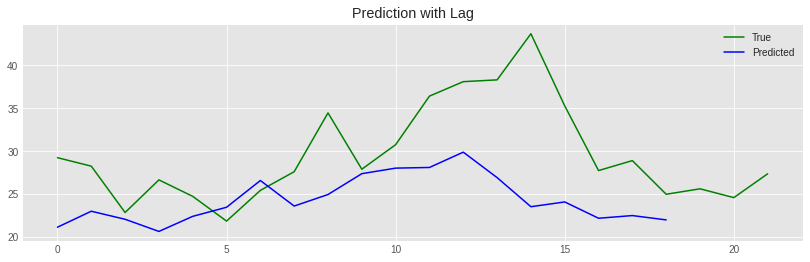

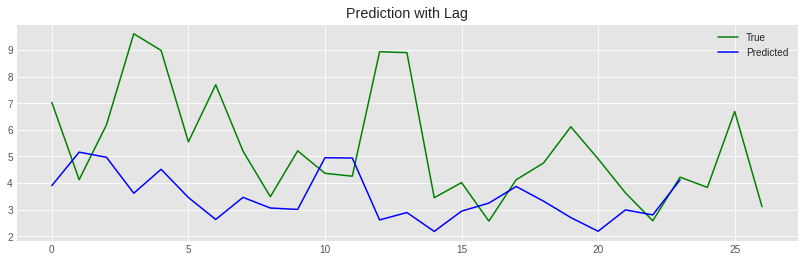

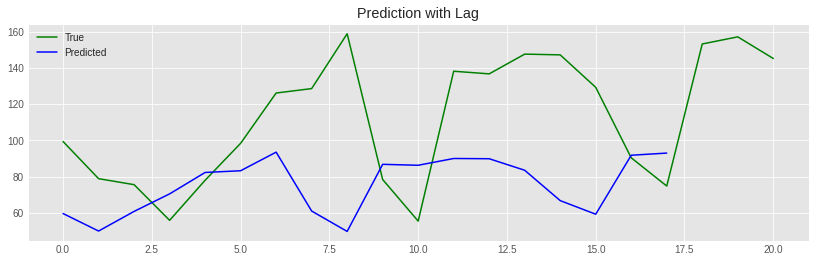

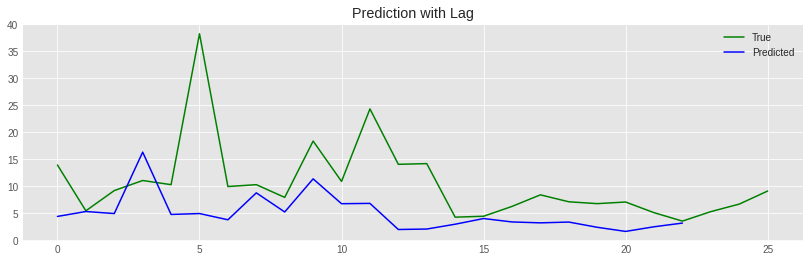

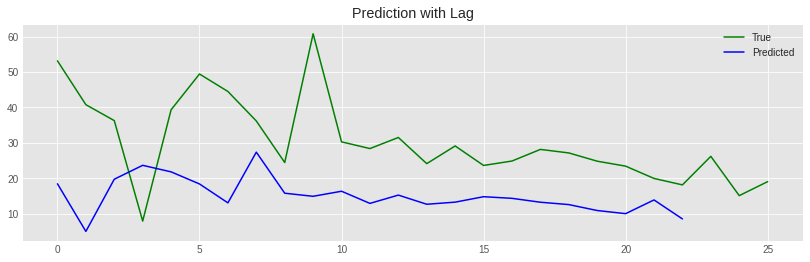

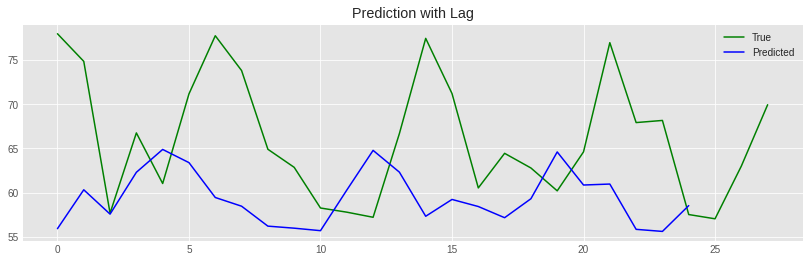

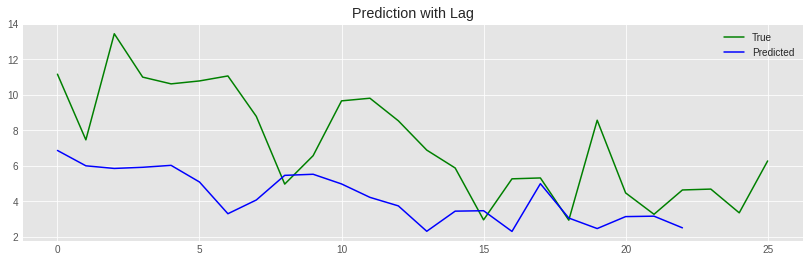

In [58]:
for country in training_countries:
    y_true = scaler_cases[country].inverse_transform(testset_cases_pre[country]["y"].reshape(-1,1))
    y_pred = scaler_cases[country].inverse_transform(test_val(args, NODE_cases, device, testset_cases[country], country, op_cases_test))
    MSE = mean_squared_error(y_true, y_pred)
    pred_result_cases[country] = {}
    pred_result_cases[country]["True"] = y_true
    pred_result_cases[country]["Pred"] = y_pred
total_error["Cases"] = 0
for country in training_countries:
  total_error["Cases"] += lagging(pred_result_cases[country], -3)

MSE with Lag    : 0.05673264613847237
MSE with Lag    : 0.04843603215490184
MSE with Lag    : 2.416752317323388
MSE with Lag    : 11.141444982044153
MSE with Lag    : 1.7480738729414211
MSE with Lag    : 4.737121768457697
MSE with Lag    : 0.9106442154104435


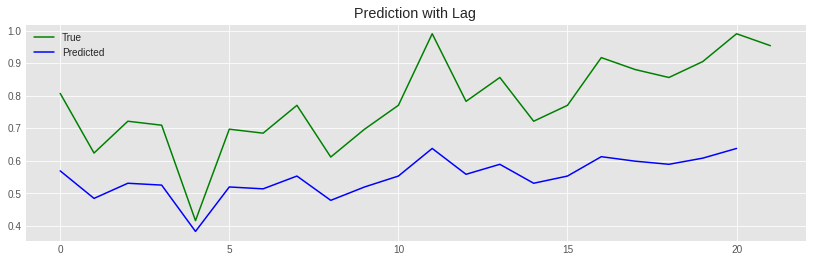

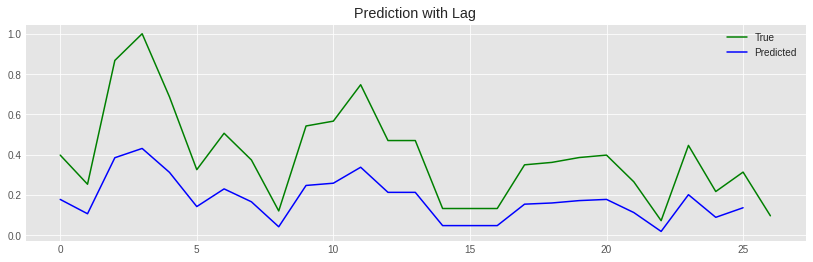

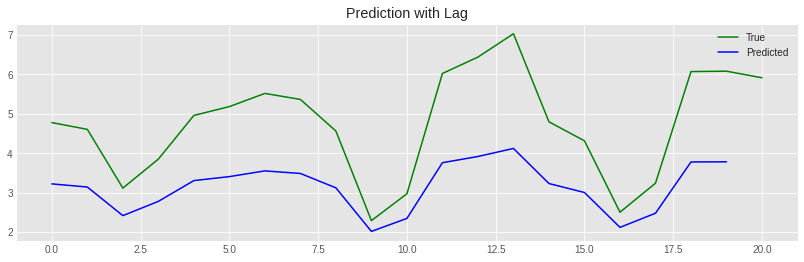

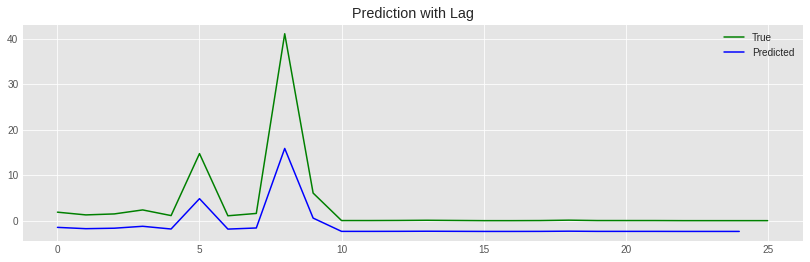

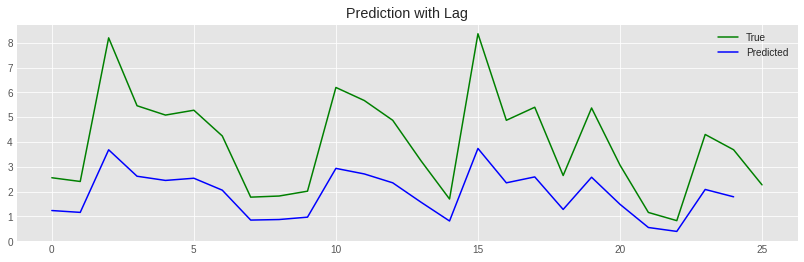

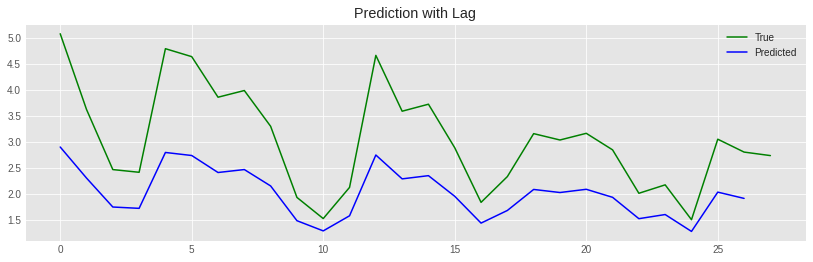

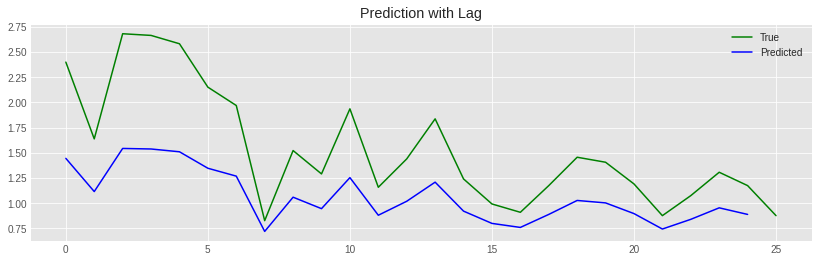

In [59]:
for country in training_countries:
    y_true = scaler_deaths[country].inverse_transform(testset_deaths_pre[country]["y"].reshape(-1,1))
    y_pred = scaler_deaths[country].inverse_transform(test_val(args, NODE_deaths, device, testset_deaths[country], country, op_deaths_test))
    MSE = mean_squared_error(y_true, y_pred)
    pred_result_deaths[country] = {}
    pred_result_deaths[country]["True"] = y_true
    pred_result_deaths[country]["Pred"] = y_pred
total_error["Deaths"] = 0
for country in training_countries:
  total_error["Deaths"] += lagging(pred_result_deaths[country], -1)

In [60]:
print(total_error)

{'Cases': 2128.897890278016, 'Deaths': 21.059205834470475}
